In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats 
import pandas as pd
import seaborn as sns
import math
from scipy.stats import lognorm
from scipy.optimize import curve_fit  
import matplotlib.pyplot as plt

In [2]:
import pylab
params = {'backend': 'ps',
          'axes.labelsize': 35,
          'legend.fontsize': 35,
          'legend.handlelength': 2.0,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 35,
          'ytick.labelsize': 35,
          'font.family': 'serif',
          'font.size': 35,
          'font.weight': 'normal',
          #'font.serif': ['Palatino'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': False}
pylab.rcParams.update(params)


# Code to show power law relationship for MB and SOC with aggregate size

In [3]:
def func_powerlaw(p, m, c):
    s= c* p**m
    return s

# Plot 2A Model capturing the effects of land use on SOC in different aggregate size classes

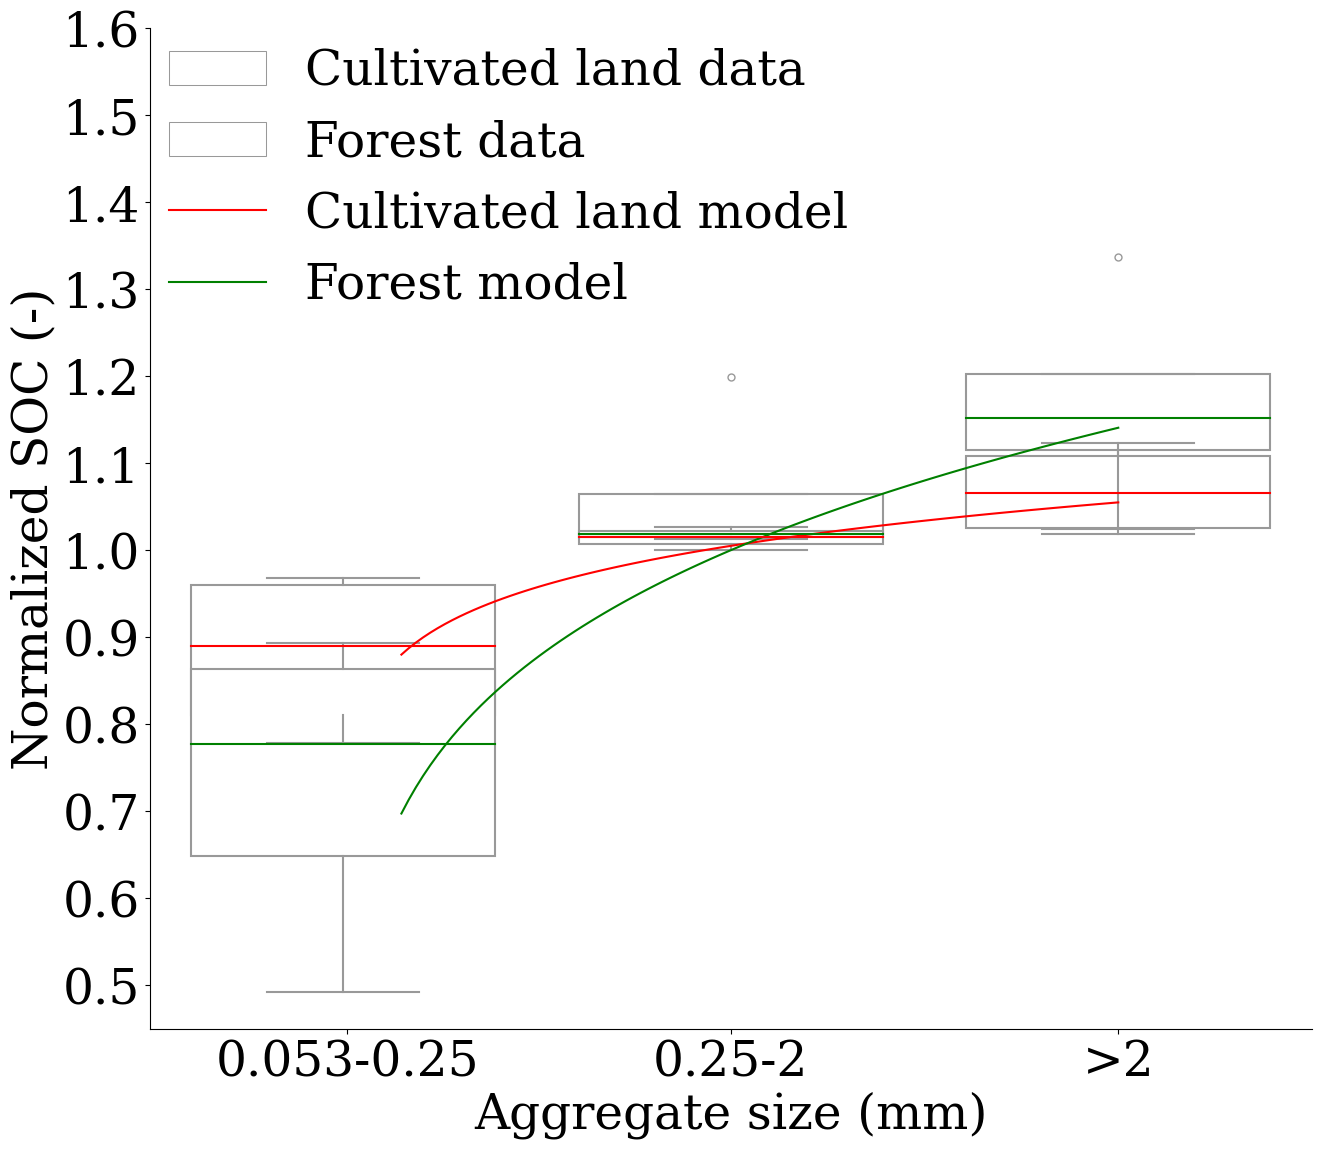

In [38]:
fig = plt.figure(figsize = (15, 13))
ax1= fig.add_subplot(111)

## Code for plotting cultivated land data from literature (normalized by the mean of each aggregate size class)

data1 = {'Cultivated land data':[0.95807645,1.0,1.01849568,0.821,1.02 ,1.123,0.96807645,1.01,1.02849568,0.77888889,1.19888889,1.10333333],
        'x':[0.15,1.125,2,0.15,1.125,2,0.15,1.125,2,0.15,1.125,2]}

df1 = pd.DataFrame(data1)

# convert dataframe from wide to long
dfl1 = pd.melt(df1, id_vars='x', value_vars=['Cultivated land data'])

# plot dfl
ax1 = sns.boxplot(x='x', y='value', data=dfl1, showfliers=True,flierprops = dict(marker = "o", markerfacecolor = "white"),medianprops = dict(color = "red"), palette=['w'], hue='variable', order=[0.15,1.125,2])


## Code for plotting forest data from literature (normalized by the mean of each aggregate size class)

data = {'Forest data':[0.89380531,1.02701444,1.02468561,0.70123278,1.01595359,1.1457578,0.853,1.0205,1.158,0.49176277,1.01235585,1.3369028],
        'x':[0.15,1.125,2,0.15,1.125,2,0.15,1.125,2,0.15,1.125,2]}

df = pd.DataFrame(data)

# convert dataframe from wide to long
dfl = pd.melt(df, id_vars='x', value_vars=['Forest data'])

# plot dfl
ax1 = sns.boxplot(x='x', y='value', data=dfl, showfliers=True,flierprops = dict(marker = "o", markerfacecolor = "white"),medianprops = dict(color = "green"), palette=['w'], hue='variable', order=[0.15,1.125,2])


## Code for plotting the Cultivated land model and Forest model based on the power law relationship

w1 = {'m':0.19,        
     'c':1.00}
p = np.linspace(0.15,2,100)
qq = [func_powerlaw(p,**w1)for p in p]


w2 = {'m':0.07,        
     'c':1.005}
p = np.linspace(0.15,2,100)
qqqq = [func_powerlaw(p,**w2)for p in p]

ax1.plot(p,qqqq,linestyle='solid', color ='r',label = 'Cultivated land model')
ax1.plot(p,qq,linestyle='solid',color='g' ,label = 'Forest model')


ax1.set_xticks([0.01,1.0,2],['0.053-0.25','0.25-2','>2'])
ax1.set_yticks(np.arange(0.5, 1.7, 0.1))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(frameon=False, loc="upper left")
ax1.set_xlabel(r'Aggregate size (mm)')
ax1.set_ylabel(r'Normalized SOC (-)')
plt.show()

# Plot 2B showing linear relationship between MB and SOC for different aggregate size classes

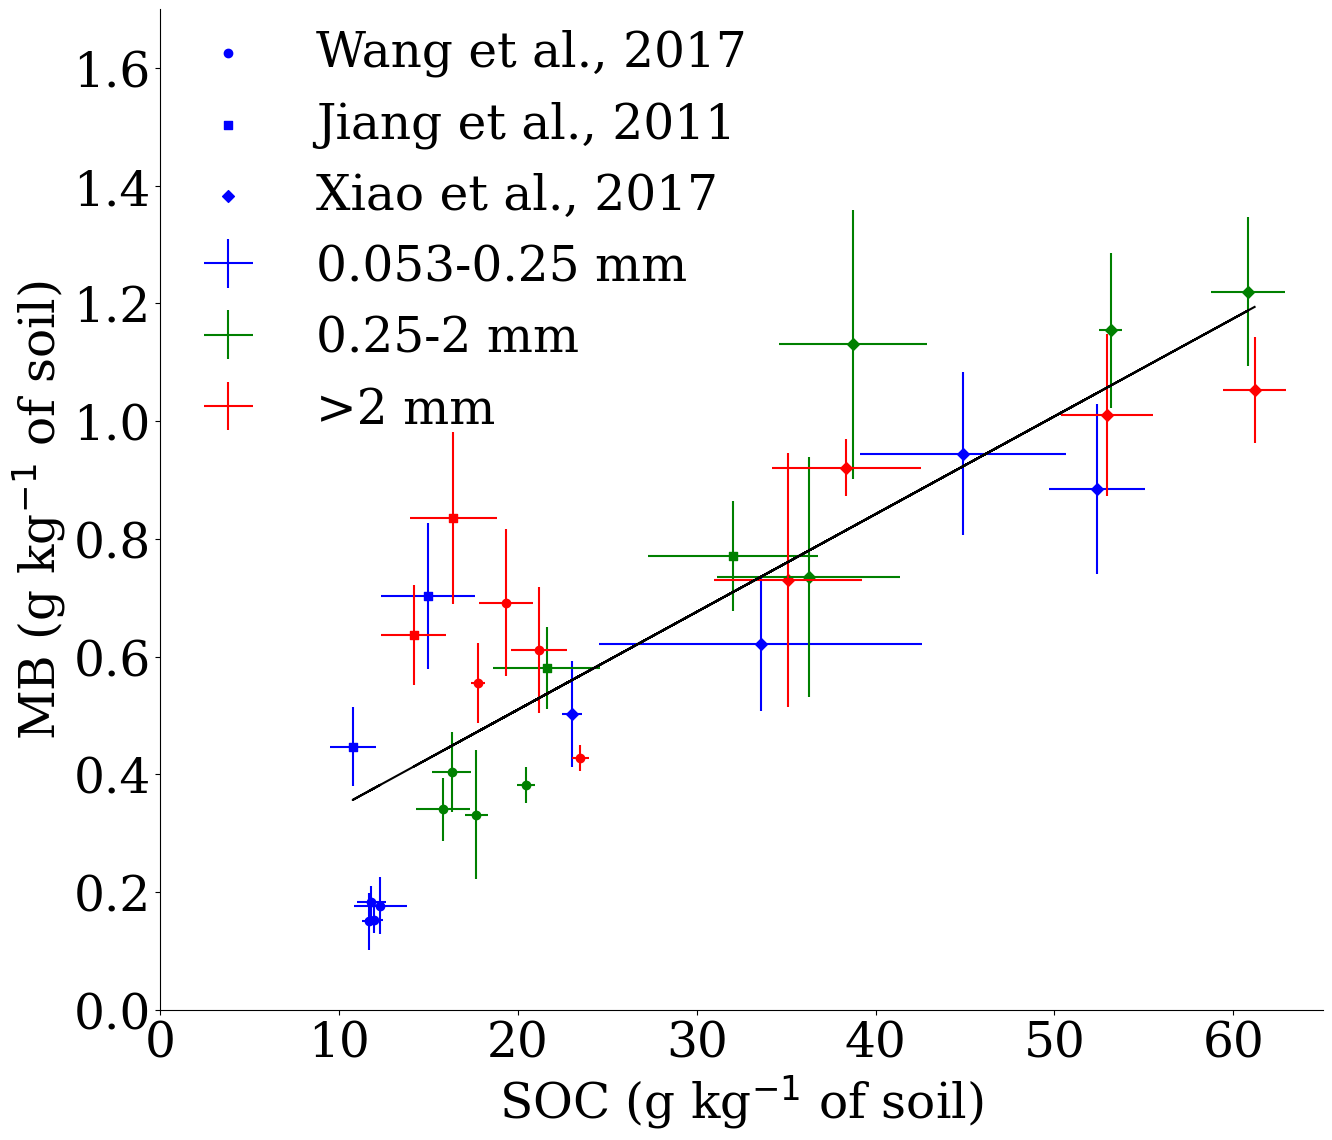

In [39]:

fig = plt.figure(figsize=(15, 13))
ax2 = fig.add_subplot(111) 

## Code for plotting the data for different aggregate size classes

# Data for 0.053-0.25 mm aggregate size:
x1 = np.array([11.79,12.31,11.68,11.94,10.76,14.97,23.02,33.57,44.89,52.37])
y1 = np.array([183.10,176.89,150.51,153.62,447.01,703.07,502.39,622.00,944.97,885.16])/1000

xerr1 = np.array([0.81,1.47,0.39,0.51,1.28,2.63,0.57,9.01,5.75,2.68])
yerr1 = np.array([27.66,48.59,48.59,23.17,67.26,123.68,89.92,113.90,137.88,143.88])/1000


# Data for 0.25-2 mm aggregate size:
x2 = np.array([15.80,16.29,17.68,20.45,21.60,32.04,36.25,38.75,53.14,60.81])
y2 = np.array([340.60,404.22,331.29,381.72,580.47,770.34,735.64,1130.38,1154.30,1220.09])/1000

xerr2 = np.array([1.51,1.09,0.64,0.48,3.0,4.74,5.11,4.15,0.63,2.07])
yerr2 = np.array([54.20,68.41,109.53,30.65,69.43,93.30,203.83,227.81,131.89,125.89])/1000

# Data for >2 mm aggregate size:
x3 = np.array([17.79,19.34,21.20,23.48,14.18,16.39,35.10,38.36,52.94,61.19])
y3 = np.array([555.51,692.06,611.37,428.27,636.88,835.44,729.66,921.05,1010.76,1052.63])/1000

xerr3 = np.array([0.39,1.50,1.56,0.48,1.81,2.45,4.15,4.15,2.55,1.75])
yerr3 = np.array([68.03,124.11,106.91,22.43,85.71,145.38,215.82,47.96,137.88,89.92])/1000

ax2.errorbar(x1, y1,xerr=xerr1,yerr=yerr1, linestyle='None',color='b',label='0.053-0.25 mm')
ax2.errorbar(x2, y2,xerr=xerr2,yerr=yerr2, linestyle='None',color='g',label='0.25-2 mm')
ax2.errorbar(x3, y3,xerr=xerr3,yerr=yerr3, linestyle='None',color='r',label='>2 mm')


cluster = np.array([1,2,3,4,5,6,7,8,9,10]) 

ax2.scatter(x1[cluster<=4],y1[cluster<=4], marker='o', color='b',label='Wang et al., 2017')
ax2.scatter(x2[cluster<=4],y2[cluster<=4], marker='o', color='g')
ax2.scatter(x3[cluster<=4],y3[cluster<=4], marker='o', color='r')


ax2.scatter(x1[cluster==5],y1[cluster==5], marker='s', color='b', label ='Jiang et al., 2011')
ax2.scatter(x2[cluster==5],y2[cluster==5], marker='s', color='g')
ax2.scatter(x3[cluster==5],y3[cluster==5], marker='s', color='r')


ax2.scatter(x1[cluster==6],y1[cluster==6], marker='s', color='b')
ax2.scatter(x2[cluster==6],y2[cluster==6], marker='s', color='g')
ax2.scatter(x3[cluster==6],y3[cluster==6], marker='s', color='r')



ax2.scatter(x1[cluster>=7],y1[cluster>=7], marker='D', color='b', label ='Xiao et al., 2017')
ax2.scatter(x2[cluster>=7],y2[cluster>=7], marker='D', color='g')
ax2.scatter(x3[cluster>=7],y3[cluster>=7], marker='D', color='r')


# # Code to show linear relationship between MB and SOC through the black line for the entire dataset


x = np.array([11.79,12.31,11.68,11.94,10.76,14.97,23.02,33.57,44.89,52.37,15.80,16.29,17.68,20.45,21.60,32.04,36.25,38.75,53.14,60.81,17.79,19.34,21.20,23.48,14.18,16.39,35.10,38.36,52.94,61.19])
y = np.array([183.10,176.89,150.51,153.62,447.01,703.07,502.39,622.00,944.97,885.16,340.60,404.22,331.29,381.72,580.47,770.34,735.64,1130.38,1154.30,1220.09,555.51,692.06,611.37,428.27,636.88,835.44,729.66,921.05,1010.76,1052.63])/1000


xerr = np.array([0.81,1.47,0.39,0.51,1.28,2.63,0.57,9.01,5.75,2.68,1.51,1.09,0.64,0.48,3.0,4.74,5.11,4.15,0.63,2.07,0.39,1.50,1.56,0.48,1.81,2.45,4.15,4.15,2.55,1.75])
yerr = np.array([27.66,48.59,48.59,23.17,67.26,123.68,89.92,113.90,137.88,143.88,54.20,68.41,109.53,30.65,69.43,93.30,203.83,227.81,131.89,125.89,68.03,124.11,106.91,22.43,85.71,145.38,215.82,47.96,137.88,89.92])/1000



slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

ax2.plot(x, mymodel,color='black')



ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim(0,65)
ax2.set_ylim(0.0,1.7)
ax2.set_xlabel(r'SOC (g kg$^{-1}$ of soil)')
ax2.set_ylabel(r'MB (g kg$^{-1}$ of soil)')
ax2.legend(frameon=False, loc="upper left")
plt.show()
